In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# VIF  
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [19]:
df_ipl=pd.read_csv('ipl_player_auction.csv')
df_ipl.head()

,PLAYER NAME,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
0,Abdulla,2,South Africa,Allrounder,0,0,0,0.000000,0,0.000000,0,0,0,0.000000,0.000000,0,307,15,20.470000,9.900000,13.930000,50000
1,Abdur Razzak,2,Bangladesh,Bowler,266,18,657,71.410000,185,37.600000,0,0,0,0.000000,0.000000,0,29,0,0.000000,17.500000,0.000000,50000
2,Agarkar,2,India,Bowler,669,58,1269,80.620000,288,32.900000,0,167,39,18.560000,121.010000,5,1059,29,36.520000,8.810000,24.900000,350000
3,Ashwin,1,India,Bowler,308,31,241,84.560000,51,36.800000,0,58,11,5.800000,76.320000,0,1125,49,22.960000,8.230000,22.140000,850000
4,Badrinath,2,India,Batsman,109,0,79,45.930000,0,0.000000,0,1317,71,32.930000,120.710000,28,0,0,0.000000,1.000000,0.000000,800000


In [20]:
df_ipl.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,130.000000,2.092308,0.576627,1.000000,2.000000,2.000000,2.000000,3.000000
T-RUNS,130.000000,2220.569231,3304.509453,0.000000,94.000000,624.500000,3061.000000,15530.000000
T-WKTS,130.000000,66.530769,142.676855,0.000000,0.000000,7.000000,47.500000,800.000000
ODI-RUNS-S,130.000000,2508.738462,3582.205625,0.000000,73.250000,835.000000,3523.500000,18426.000000
ODI-SR-B,130.000000,71.185231,25.912831,0.000000,65.632500,78.225000,86.790000,116.660000
ODI-WKTS,130.000000,76.076923,111.205070,0.000000,0.000000,18.500000,106.000000,534.000000
ODI-SR-BL,130.000000,34.033846,26.751749,0.000000,0.000000,36.600000,45.325000,150.000000
CAPTAINCY EXP,130.000000,0.315385,0.466466,0.000000,0.000000,0.000000,1.000000,1.000000
RUNS-S,130.000000,514.492308,615.582566,0.000000,39.000000,172.000000,925.250000,2254.000000
HS,130.000000,47.430769,36.403624,0.000000,16.000000,35.500000,73.750000,158.000000


In [21]:
df_ipl.dtypes

PLAYER NAME       object
AGE                int64
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP      int64
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

In [22]:
df_ipl['AGE']=df_ipl['AGE'].astype('object')

df_ipl['CAPTAINCY EXP']=df_ipl['CAPTAINCY EXP'].astype('object')

In [23]:
df_ipl.dtypes

PLAYER NAME       object
AGE               object
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP     object
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

In [24]:
# Removing insignificate variable
df_ipl=df_ipl.drop('PLAYER NAME',axis=1)
df_ipl.head()

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
0,2,South Africa,Allrounder,0,0,0,0.000000,0,0.000000,0,0,0,0.000000,0.000000,0,307,15,20.470000,9.900000,13.930000,50000
1,2,Bangladesh,Bowler,266,18,657,71.410000,185,37.600000,0,0,0,0.000000,0.000000,0,29,0,0.000000,17.500000,0.000000,50000
2,2,India,Bowler,669,58,1269,80.620000,288,32.900000,0,167,39,18.560000,121.010000,5,1059,29,36.520000,8.810000,24.900000,350000
3,1,India,Bowler,308,31,241,84.560000,51,36.800000,0,58,11,5.800000,76.320000,0,1125,49,22.960000,8.230000,22.140000,850000
4,2,India,Batsman,109,0,79,45.930000,0,0.000000,0,1317,71,32.930000,120.710000,28,0,0,0.000000,1.000000,0.000000,800000


## Missing Value Treatment

In [25]:
df_ipl.isnull().sum().sort_values(ascending=True)

AGE              0
ECON             0
AVE-BL           0
WKTS             0
RUNS-C           0
SIXERS           0
SR-B             0
AVE              0
HS               0
SR-BL            0
RUNS-S           0
ODI-SR-BL        0
ODI-WKTS         0
ODI-SR-B         0
ODI-RUNS-S       0
T-WKTS           0
T-RUNS           0
PLAYING ROLE     0
COUNTRY          0
CAPTAINCY EXP    0
SOLD PRICE       0
dtype: int64

## Dummy Encode the categorical Variable

### Split the dependent and indepndent variable

In [26]:
# Target variable is SOLD PRICE
df_target=df_ipl['SOLD PRICE']

In [27]:
# Store all the indepndent varable 
df_feature = df_ipl.drop('SOLD PRICE',axis=1)

### Filtering numerical and categorical variables

In [28]:
# Numberical columns
df_num=df_feature.select_dtypes(include=[np.number])
df_num.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL'],
      dtype='object')

In [29]:
# Categorical columns
df_cat=df_feature.select_dtypes('object')
df_cat.columns

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP'], dtype='object')

In [30]:
# Use 'get-dummy =' from pandas to create dummy variable
dummy_var=pd.get_dummies(data=df_cat,drop_first=True).astype(int)
dummy_var.head()

,AGE_2,AGE_3,COUNTRY_Bangladesh,COUNTRY_England,COUNTRY_India,COUNTRY_New Zealand,COUNTRY_Pakistan,COUNTRY_South Africa,COUNTRY_Sri Lanka,COUNTRY_West Indies,COUNTRY_Zimbabwe,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [31]:
#intialiize the std. scaleer
X_scaler=StandardScaler()

num_scaled=X_scaler.fit_transform(df_num)
#scaling all num var, standardize all the col of df df_num

df_num_scaled=pd.DataFrame(num_scaled,columns=df_num.columns)
#create a df of scaled numerical variable,
                                                              
#ass the reqd col names to the parmater columns
y=df_target

### Concatenate scaled numerical and dummy encoded categorical variable

In [32]:
X=pd.concat([df_num_scaled,dummy_var],axis=1)
X.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_Bangladesh,COUNTRY_England,COUNTRY_India,COUNTRY_New Zealand,COUNTRY_Pakistan,COUNTRY_South Africa,COUNTRY_Sri Lanka,COUNTRY_West Indies,COUNTRY_Zimbabwe,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,-0.674581,-0.468108,-0.703043,-2.757731,-0.686760,-1.277132,-0.839014,-1.307954,-1.693829,-3.102818,-0.745369,-0.303010,-0.096956,-0.123459,0.423147,-0.226928,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.593774,-0.341460,-0.518927,0.008708,0.983269,0.133821,-0.839014,-1.307954,-1.693829,-3.102818,-0.745369,-0.802864,-0.786968,-1.111749,1.877704,-1.142498,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.471347,-0.060022,-0.347421,0.365505,1.913068,-0.042548,-0.566677,-0.232487,-0.014415,0.278728,-0.534721,1.049112,0.547056,0.651433,0.214533,0.494091,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,-0.581015,-0.249993,-0.635505,0.518141,-0.226374,0.103801,-0.744430,-1.004617,-1.169012,-0.970105,-0.745369,1.167783,1.467072,-0.003242,0.103527,0.312686,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,-0.641468,-0.468108,-0.680904,-0.978393,-0.686760,-1.277132,1.308699,0.649946,1.285864,0.270344,0.434258,-0.855007,-0.786968,-1.111749,-1.280217,-1.142498,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [33]:
X.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_Bangladesh',
       'COUNTRY_England', 'COUNTRY_India', 'COUNTRY_New Zealand',
       'COUNTRY_Pakistan', 'COUNTRY_South Africa', 'COUNTRY_Sri Lanka',
       'COUNTRY_West Indies', 'COUNTRY_Zimbabwe', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [34]:
# split data into train subset and test subset
# set random state' to generate the same dataset each time you run the code
# "test_size" returns the proportion of data to be included in the testing se
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10,test_size=0.2)

#check the dimensions of the train & test subset using 'shape"
# print dimension of train set 
print('X_train',X_train.shape)
print('y_train', y_train.shape)


# print dimension of test set 
print('X_test', X_test.shape)
print('y_test',y_test.shape)

X_train (104, 31)
y_train (104,)
X_test (26, 31)
y_test (26,)


In [35]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model) :
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_tra
    # Y_train: actual values ofthe target variable for the train dataset
    # predict the output of the target variable from the train data
    train_pred = model.predict(X_train)
    # calculate the MSE using the "mean_squared_error" function
    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)
    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    # return the training RMSE
    return(rmse_train)

### Create a generalized function to calculate the MAPE for test set

In [36]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAP
def mape(actual, predicted):
    return(np.mean(np.abs ((actual - predicted) / actual))* 100)
def get_test_mape(model) :
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # Y_test: actual values of the target variable for the test dataset
    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    # calculate the mape using the "mape()" function created above
    #calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)
    # return the MAPE for the test set 
    return(mape_test)

In [37]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]" returns number of rows
    n=X_train.shape[0]
    # 'k' denotes number of variables in train set
    # 'shape[1] returns number of columns
    k = X_train.shape[1]
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    # return the R-squared and adjusted R-squared value 
    return ([r_sq,r_sq_adj])

In [38]:
# create an empty dataframe to store the scores for various algorithms
score_card=pd.DataFrame(columns=['Model_Name','Alpha(Wherever Required)','l1-ratio','R-Squared','Adj. R-Squared','Test_RMSE','Test_MAPE'])

# create a function to update the score card for comparision of the scored from different algorithms
# pass the model name,model build,alpha and l1_ratio as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified the fucntion assigns '-'
def update_score_card(algorithm_name,model,alpha='-',l1_ratio='-'):
    # assign 'score-card' as global variable
    global score_card
    # append the results to the dataframe 'score-card'
    # ignore_index=True do not consider the index labels
    score_card=score_card._append({'Model_Name':algorithm_name,
                                 'Alpha(Wherever Required)':alpha,
                                'l1-ratio':l1_ratio,
                                'Test_MAPE':get_test_mape(model),
                                'Test_RMSE':get_train_rmse(model),
                                'R-Squared':get_score(model)[0],
                                'Adj. R-Squared':get_score(model)[1]},ignore_index=True)

In [39]:
# define a function to plot a barplot
#pass the model
def plot_coefficients (model, algorithm_name):
    # create a dataframe of variable 
    # names and their corresponding value of coefficients obtained fr 
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef returns the coefficient of each variable
    df_coeff = pd.DataFrame({ 'Variable': X.columns, 'Coefficient': model.coef_})
    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot 
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    # add x-axis Label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    # add y-axis Label
    # set the size of the text using 'fontsize' 
    plt.ylabel('Features', fontsize = 15)

## 3. Multiple Linear Regression(OLS)

### Built a MLR model on a training dataset

In [40]:
# initiate linear regeression model
linreg=LinearRegression()

# build the model using X_test and y_test
# use fit() to fit the regression model
MLR_model =linreg.fit(X_train,y_train)

# print the R-squared value for the model

MLR_model.score(X_train,y_train)

0.5839698427213922

In [74]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset
    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)
    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)
    # return the test RMSE
    return(rmse_test)

In [75]:
# print training RMSE
print('RMSE on train set:',get_train_rmse(MLR_model))

# print training RMSE
print('RMSE on train set:',get_test_rmse(MLR_model))

# Calculate the diff between test and train
difference=abs(get_test_rmse(MLR_model)-get_train_rmse(MLR_model))

# Print the difference
print('Differnce between RMSE on train and test set:',difference)


RMSE on train set: 268841.9725
RMSE on train set: 355590.2012
Differnce between RMSE on train and test set: 86748.22870000004


In [76]:
y_log = np.log(y_train)
m = LinearRegression().fit(X_train,y_log)
y_pred = m.predict(X_test)
mean_squared_error(y_test,np.exp(y_pred))

129801718278.9073

In [77]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Linear Regression',model=MLR_model)

score_card
 

,Model_Name,Alpha(Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.583970,0.404846,268841.972500,125.755268


# Ridge Regression

### Built regression model using bridge Regression for alpha = 1

In [78]:
# use ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to model
# 'max_iter' assigns maximum number of iteration for the model to run
ridge=Ridge(alpha=1,max_iter=500)

# fit the model on test set
ridge.fit(X_train,y_train)

# Print RMSE for test set
print('RMSE on test set:',get_test_rmse(ridge))

RMSE on test set: 343272.526


In [79]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha =1)',model=MLR_model)

# print dataframe
score_card

,Model_Name,Alpha(Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.583970,0.404846,268841.972500,125.755268
1,Ridge Regression (with alpha =1),-,-,0.583970,0.404846,268841.972500,125.755268


### Built regression model using bridge Regression for alpha = 2

In [80]:
# use ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to model
# 'max_iter' assigns maximum number of iteration for the model to run
ridge=Ridge(alpha=2,max_iter=500)

# fit the model on test set
ridge.fit(X_train,y_train)

# Print RMSE for test set
print('RMSE on test set:',get_test_rmse(ridge))

RMSE on test set: 340372.5818


In [81]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha =2)',model=MLR_model)

# print dataframe
score_card

,Model_Name,Alpha(Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.583970,0.404846,268841.972500,125.755268
1,Ridge Regression (with alpha =1),-,-,0.583970,0.404846,268841.972500,125.755268
2,Ridge Regression (with alpha =2),-,-,0.583970,0.404846,268841.972500,125.755268


In [82]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient':model.coef_})
    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 10)
    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 10)

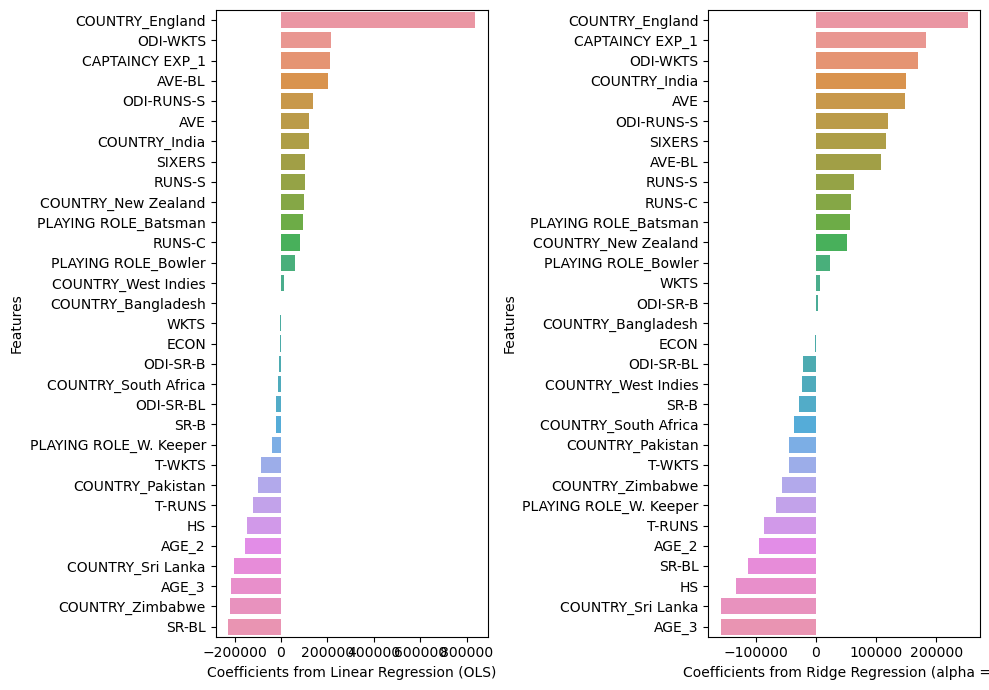

In [83]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plot_coefficients(MLR_model,'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients(ridge,'Ridge Regression (alpha =2)')
plt.tight_layout()
plt.show()

# Lasso Regression

In [84]:
# use lasso() to perform ridge regression
# 'alpha' assigns the regularization strength to model
# 'max_iter' assigns maximum number of iteration for the model to run
lasso=Lasso(alpha=0.01,max_iter=500)

# fit the model on test set
lasso.fit(X_train,y_train)

# Print RMSE for test set
print('RMSE on test set:',get_test_rmse(lasso))

RMSE on test set: 355589.7658


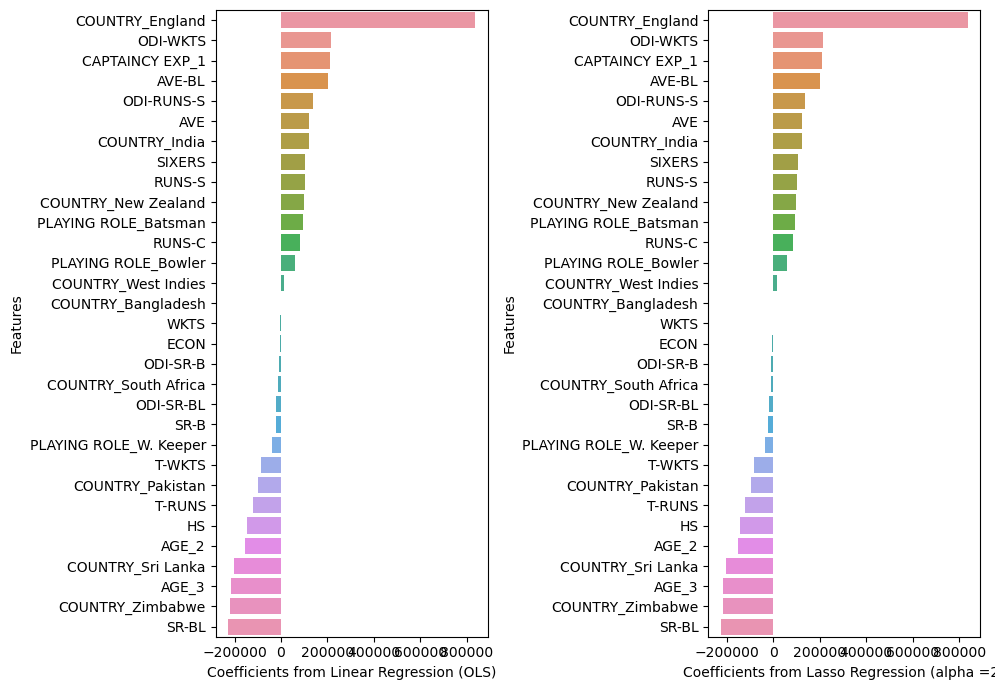

In [85]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plot_coefficients(MLR_model,'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients(lasso,'Lasso Regression (alpha =2)')
plt.tight_layout()
plt.show()

In [86]:
# create dataframe to store the variable name and there corresponding coef
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient':lasso.coef_})
# print the variable having the coefficiante value equal to zero
# 'to_list()' converts the output
print('Insignificate variable obtained from lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient==0].to_list()

Insignificate variable obtained from lasso Regression when alpha is 0.01


['COUNTRY_Bangladesh']

In [87]:
# use ElasticNet() to perform Elastic Net regression

enet = ElasticNet(alpha =0.1,l1_ratio = 0.01,max_iter=500)

enet.fit(X_train,y_train)

print('RMSE on test set:',get_test_rmse(enet))

RMSE on test set: 325736.0103


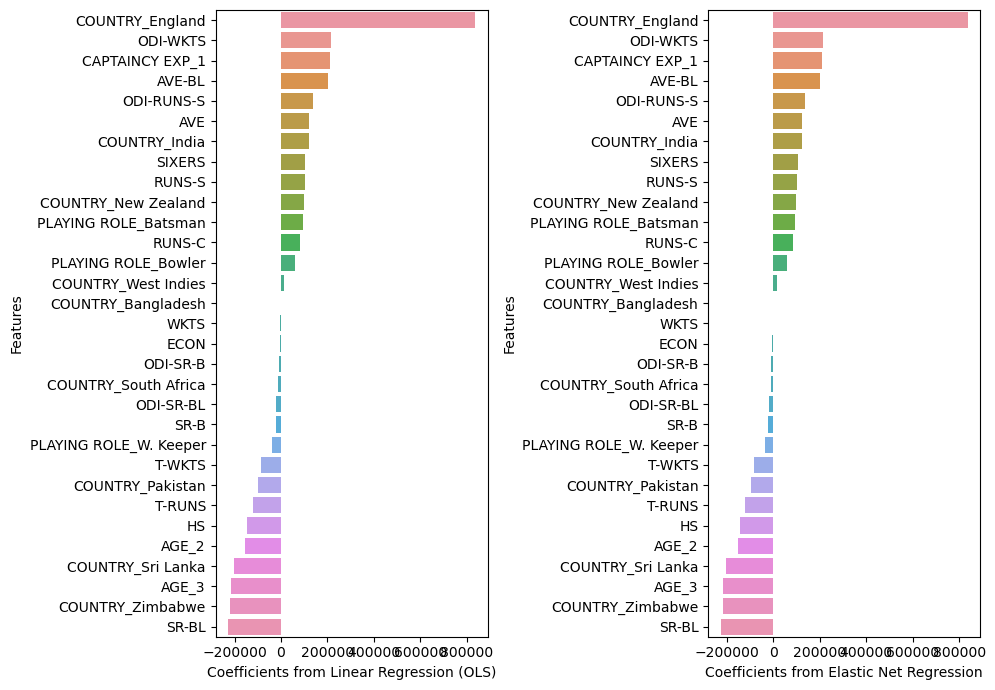

In [88]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plot_coefficients(MLR_model,'Linear Regression (OLS)')
# pass the index of the plot as the third parameters of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso,'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

## Grid Search

In [89]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_parameters=[{'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,0.1,1,5,10,20,40,60,80,100],
                  'max_iter':[100,200,200,400,500]}]

# initiate the ridge regression model
ridge=Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e here cv=10
ridge_grid=GridSearchCV(estimator=ridge,param_grid=tuned_parameters,cv=10)

# fit the model on X_train andy_train using fit()
ridge_grid.fit(X_train,y_train)

# get the best parameters
print("Best parameters for Ridge Regression: "\
     , ridge_grid.best_params_,"\n")

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:',get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 20, 'max_iter': 100} 

RMSE on test set: 318975.9305


**It only give best params not making any model**

In [90]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (using GridSearchCV)',\
                  model=ridge_grid,alpha=ridge_grid.best_params_.get('alpha'))

# print dataframe
score_card

,Model_Name,Alpha(Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.583970,0.404846,268841.972500,125.755268
1,Ridge Regression (with alpha =1),-,-,0.583970,0.404846,268841.972500,125.755268
2,Ridge Regression (with alpha =2),-,-,0.583970,0.404846,268841.972500,125.755268
3,Ridge Regression (using GridSearchCV),20,-,0.464128,0.233405,305116.280100,98.139952


In [91]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model
enet = ElasticNet()

enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train andy_train using fit()
enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.1, 'l1_ratio': 0.0001} 

RMSE on test set: 325626.1987
